In [1]:
# import kagglehub
# import shutil
# import os
# # Download latest version
# path = kagglehub.dataset_download("ealaxi/paysim1")

# print("Path to dataset files:", path)

In [2]:

# # Define the destination directory
# destination_dir = os.getcwd()

# # Move the contents of the path directory to the current directory
# for filename in os.listdir(path):
#     shutil.move(os.path.join(path, filename), destination_dir)

# print("Data moved to current directory:", destination_dir)

In [3]:
# shutil.rmtree(path)
# print(f"Data at {path} has been removed.")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
DF = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
DF.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
DF.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
DF.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
DF = DF.drop(['nameOrig', 'nameDest'], axis=1)

In [9]:
DF.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
DF['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
DF['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [12]:
DF = pd.concat([DF, pd.get_dummies(DF['type'], prefix='type')], axis=1)

In [13]:
DF.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False


In [14]:
DF = DF.drop('type', axis=1)

In [15]:
DF.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False


In [16]:
DF['amount_deducted'] = DF['oldbalanceOrg'] - DF['newbalanceOrig']
DF['amount_credited'] = DF['newbalanceDest'] - DF['oldbalanceDest']

In [17]:
DF['is_equal'] = DF['amount'] == DF['amount_deducted']

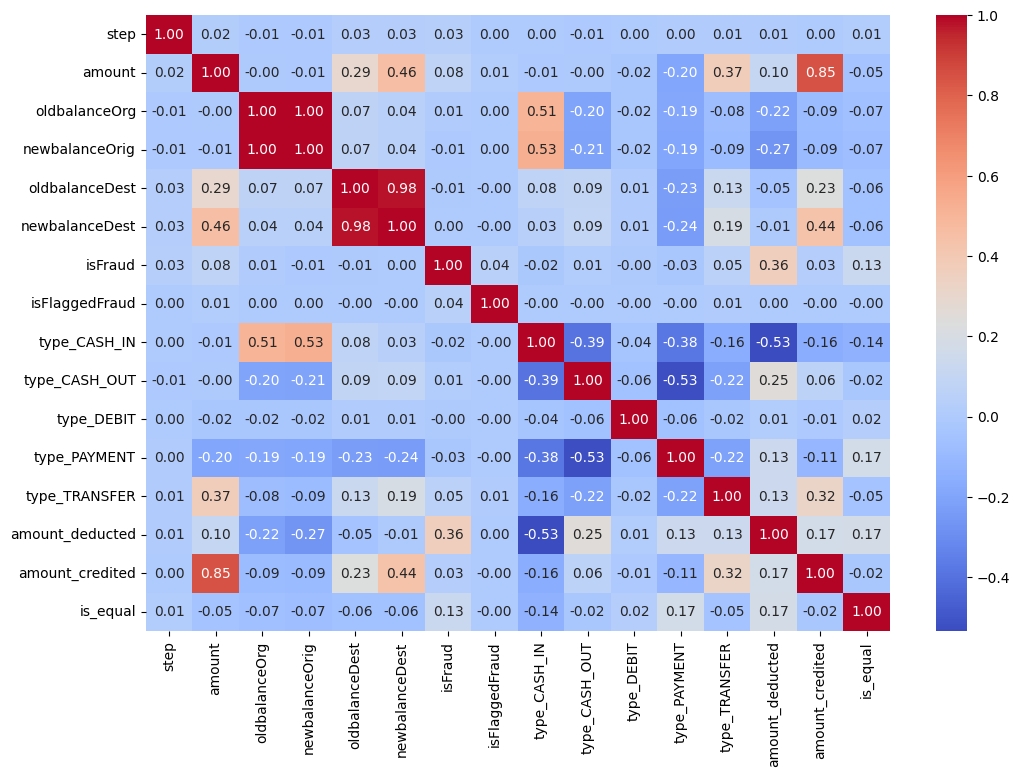

In [18]:
import seaborn as sns

DF.corr()
# Compute the correlation matrix
corr = DF.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DF_scaled = pd.DataFrame(scaler.fit_transform(DF), columns=DF.columns)
DF_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_deducted,amount_credited,is_equal
0,0.0,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.161566,0.109987,0.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.160897,0.109987,0.0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160756,0.109987,1.0
3,0.0,0.000002,0.000003,0.000000,0.000059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.160756,0.109809,1.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.161720,0.109987,1.0


In [20]:
DF_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             float64
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          float64
 7   isFlaggedFraud   float64
 8   type_CASH_IN     float64
 9   type_CASH_OUT    float64
 10  type_DEBIT       float64
 11  type_PAYMENT     float64
 12  type_TRANSFER    float64
 13  amount_deducted  float64
 14  amount_credited  float64
 15  is_equal         float64
dtypes: float64(16)
memory usage: 776.7 MB


In [ ]:
X = DF_scaled.drop('isFraud', axis=1)
Y = DF_scaled['isFraud']

In [49]:
X.shape

(6362620, 15)

In [22]:
data= Y.value_counts()

alpha = data[1]/(data[1]+data[0])
print(alpha)

0.001290820448180152


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)   

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2., alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean()

# Example usage:
# criterion = FocalLoss(gamma=2., alpha=0.25)
# loss = criterion(outputs, targets)

In [38]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer with 50% probability

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [39]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import optim

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert DataFrame to PyTorch tensors and move them to the GPU
X_tensor = torch.tensor(x_train.values, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)

# Create a dataset and data loader
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Move the model to the GPU
model = SimpleNN().to(device)
criterion = FocalLoss(gamma=2., alpha=alpha).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


In [ ]:

from tqdm import tqdm

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    model.train()
    running_loss = 0.0
    correct_0 = 0
    correct_1 = 0
    total_0 = 0
    total_1 = 0
    
    for inputs, targets in tqdm(dataloader, desc=f"Training Epoch {epoch+1}"):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Calculate accuracy
        predicted = torch.sigmoid(outputs).round()
        correct_0 += ((predicted == 0) & (targets == 0)).sum().item()
        correct_1 += ((predicted == 1) & (targets == 1)).sum().item()
        total_0 += (targets == 0).sum().item()
        total_1 += (targets == 1).sum().item()
    
    accuracy_0 = correct_0 / total_0 if total_0 > 0 else 0
    accuracy_1 = correct_1 / total_1 if total_1 > 0 else 0
    
    print(f" Loss: {running_loss/len(dataloader)}, Accuracy Class 0: {accuracy_0}, Accuracy Class 1: {accuracy_1}")


ERROR: Could not find a version that satisfies the requirement pytorch-auc (from versions: none)
ERROR: No matching distribution found for pytorch-auc


In [40]:
model.load_state_dict(torch.load("/workspace/saumilya/Fraud-detection/simple_nn_model_big_dropout_89.pth", map_location=device))
model.eval()  # Set model to evaluation mode


/workspace/tmp/ipykernel_1353/204430629.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/workspace/saumilya/Fraud-detection/simple_nn_m

SimpleNN(
  (fc1): Linear(in_features=15, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [52]:
def predict_fraud():
    feature_names = ["step", "amount", "oldbalanceOrg", "newbalanceOrig", 
                     "oldbalanceDest", "newbalanceDest", "amount_deducted", 
                     "amount_credited", "is_equal", "isFlaggedFraud",
                     "type_CASH_IN", "type_CASH_OUT", "type_DEBIT", 
                     "type_PAYMENT", "type_TRANSFER"]  # Ensure all one-hot encoded type columns are included

    print("\nEnter transaction details:")
    user_input = []
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        user_input.append(value)

    # Convert input to tensor
    input_tensor = torch.tensor([user_input], dtype=torch.float32).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.sigmoid(output).item()

    # Print result
    print("\nPrediction:", "Fraudulent Transaction" if prediction > 0.5 else "Legitimate Transaction")

# Run prediction function
predict_fraud()


Enter transaction details:

Prediction: Legitimate Transaction


In [48]:
print(model)  


SimpleNN(
  (fc1): Linear(in_features=15, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
